In [1]:
#spark avec python
!pip install pyspark
!pip install findspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488493 sha256=1b45f89db3362902f8083378da7987ed0a4fe393c55cfc1f515c5b7fac3e7f19
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
### config
from pyspark.sql import SparkSession # required to created a dataframe
spark=SparkSession.builder.appName("Basics").getOrCreate() 
#spark=SparkSession.builder.appName("Basics").config("spark.executor.memory", "70g").config("spark.driver.memory", "50g").config("spark.memory.offHeap.enabled",True).config("spark.memory.offHeap.size","16g").getOrCreate() 

import pyspark.sql.functions

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/24 18:31:48 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
file = '../input/bitcoin-tweets-20160101-to-20190329/tweets.csv'
df = spark.read.csv(file, sep=";",inferSchema=True, header=True,multiLine=True)

In [4]:
n_rows=df.count()
n_cols = len(df.columns)


In [5]:
#colonnes 
print(n_rows,n_cols)
df.printSchema()

17026912 9
root
 |-- id: string (nullable = true)
 |-- user: string (nullable = true)
 |-- fullname: string (nullable = true)
 |-- url: string (nullable = true)
 |-- timestamp: string (nullable = true)
 |-- replies: string (nullable = true)
 |-- likes: string (nullable = true)
 |-- retweets: string (nullable = true)
 |-- text: string (nullable = true)



In [6]:
# df=df.drop("PrefixedName")

In [7]:
df.head(10)

[Row(id='1132977055300300800', user='KamdemAbdiel', fullname='Abdiel kamdem', url=None, timestamp='2019-05-27 11:49:14+00', replies='0', likes='0', retweets='0', text='È appena uscito un nuovo video! LES CRYPTOMONNAIES QUI PULVÉRISENT BITCOIN EN 2019 https://t.co/yCsQMvRnyS'),
 Row(id='1132977073402736640', user='bitcointe', fullname='Bitcointe', url=None, timestamp='2019-05-27 11:49:18+00', replies='0', likes='0', retweets='0', text='Cardano: Digitize Currencies; EOS https://t.co/1kTKqKEBlS 6500% ROI; AT&amp;T Bitcoin Bill Pay https://t.co/eQCwOXKHK0   |  Cardano (ADA) 🌏📢😎🤑💵 | #FolloForFolloBack #follo4folloback #followforfollow #bitcointe #cryptocurrency'),
 Row(id='1132977023893139456', user='3eyedbran', fullname='Bran - 3 Eyed Raven', url=None, timestamp='2019-05-27 11:49:06+00', replies='0', likes='2', retweets='1', text="Another Test tweet that wasn't caught in the stream ! bitcoin"),
 Row(id='1132977089089556481', user='DetroitCrypto', fullname='J. Scardina', url=None, timestamp

In [8]:
from pyspark.sql.functions import col
# 
df = df.withColumn("likes", col("likes").cast("integer"))
df = df.withColumn("retweets", col("retweets").cast("integer"))
df = df.withColumn("replies", col("retweets").cast("integer"))

In [9]:
#suprimmer tweet vides (retweets sans caption)
df=df.filter(~df["text"].isNull())

In [10]:
like_sort=df.orderBy(df["likes"].desc(),df["retweets"].desc())

In [108]:
top_likes=like_sort.select("timestamp","likes","retweets","text").head(10)

In [12]:
top_likes

[Row(timestamp='2019-04-04 02:07:05+00', likes=291985, retweets=61585, text='The type of accidents I’m tryna make https://t.co/Z47ImFA14m'),
 Row(timestamp='2018-01-24 17:29:19+00', likes=282959, retweets=64013, text="FRIENDS 2018 PLOTLINES\n-Joey eats Tide pods, goes to hospital (guest star Ellen Pompeo)\n-Chandler won't shut up about how funny his Vines were\n-Ed Sheeran cameo interrupts Phoebe's Central Perk set \n-Ross gets everyone into Bitcoin\n-The One Where The Gang Realizes Their Privilege"),
 Row(timestamp='2018-01-16 23:02:59+00', likes=138468, retweets=34318, text='if you lost money on bitcoin today target is giving away $5 giftcards to anyone that gets a flu shot. on my 8th shot today. feel great. fuck a 9-5'),
 Row(timestamp='2017-12-09 03:47:00+00', likes=130455, retweets=22002, text='Wow, if I had invested $1,000 in Bitcoin last week, today I would have... still no idea how Bitcoin works.'),
 Row(timestamp='2017-12-23 23:30:42+00', likes=124513, retweets=26413, text='th

In [13]:
top_likes[0].text

'The type of accidents I’m tryna make https://t.co/Z47ImFA14m'

In [14]:
#code to remove url
from urllib.parse import urlparse
import re

def remove_urls(s):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    # Replace URLs with an empty string
    return url_pattern.sub('[url]', s)


In [15]:
pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.6 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=6834dc9c8bfad5efbb4580b0bb89872f9e0cff87f54e4c65c3a22380d2331909
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
     

In [16]:
#code to detect and translate language 
from googletrans import Translator
from nltk.tokenize import sent_tokenize
def translate_to_english(text):
    # Create a Translator object
    translator = Translator()

    # Detect the language of the text
    detected_lang = translator.detect(text).lang

    # If the detected language is not English, translate the text to English
    if detected_lang != 'en':
#         print("detected language",detected_lang) #out language 
        translated_text = translator.translate(text, src=detected_lang, dest='en').text
    else:
        translated_text = text

    return translated_text


In [17]:
common_time=df.groupBy("timestamp").count()

In [18]:
common_time.orderBy(col("count").desc()).where(col('timestamp').isNotNull()).show()

24/05/24 18:36:54 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/05/24 18:37:33 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.


+--------------------+-----+
|           timestamp|count|
+--------------------+-----+
|2019-06-04 17:41:...|  102|
|2019-06-16 08:47:...|   99|
|2019-06-29 02:01:...|   85|
|2019-06-21 08:01:...|   79|
|2019-07-19 13:05:...|   73|
|2019-07-20 16:58:...|   71|
|2019-06-04 00:02:...|   67|
|2019-06-04 22:24:...|   67|
|2019-06-03 14:49:...|   66|
|2019-07-15 18:20:...|   66|
|2019-07-09 16:05:...|   63|
|2019-07-13 18:18:...|   63|
|2019-07-05 19:50:...|   62|
|2019-06-28 07:01:...|   61|
|2019-07-08 09:00:...|   61|
|2019-06-04 22:00:...|   60|
|2019-07-02 08:48:...|   60|
|2019-06-02 13:18:...|   59|
|2019-06-29 16:12:...|   59|
|2019-07-10 01:30:...|   58|
+--------------------+-----+
only showing top 20 rows



In [19]:
popular=df.filter(col('timestamp').contains("2019-06-04 17:41:"))

In [20]:
popular.select("id","timestamp","text").head(10)
#bots et spam 

[Row(id='1135964769737986048', timestamp='2019-06-04 17:41:20+00', text='#btc #btc rumor winkles  want out \n\nthought they were already out \n\n#crypto😍urrencies $gbtc 😍😍😍😍😍😍'),
 Row(id='1135964688536260613', timestamp='2019-06-04 17:41:01+00', text='⏰ LIQUIDATION on BTC-27SEP19 ☠️️\n\n Sold $200 of #BTC @ $7764.00\n 4 Jun 2019 17:40:11 UTC\nTrade ID: 23243314'),
 Row(id='1135964688515325956', timestamp='2019-06-04 17:41:01+00', text='⏰ LIQUIDATION on BTC-27SEP19 ☠️️\n\n Bought $5,060 of #BTC @ $7763.25\n 4 Jun 2019 17:40:11 UTC\nTrade ID: 23243330\n\nThose who seek the Lord lack no good thing.'),
 Row(id='1135964688594952194', timestamp='2019-06-04 17:41:01+00', text='⏰ LIQUIDATION on BTC-27SEP19 ☠️️\n\n Sold $5,000 of #BTC @ $7736.50\n 4 Jun 2019 17:40:19 UTC\nTrade ID: 23243786\n\nSome people like taking the long way home.'),
 Row(id='1135964688678871041', timestamp='2019-06-04 17:41:01+00', text='⏰ LIQUIDATION on BTC-27SEP19 ☠️️\n\n Bought $330 of #BTC @ $7763.25\n 4 Jun 2019 17:4

In [21]:
from transformers import pipeline
     
def detect_lang(tokens_array):
     model_ckpt = "papluca/xlm-roberta-base-language-detection"
     pipe = pipeline("text-classification", model=model_ckpt)
     return pipe(tokens_array, top_k=1, truncation=True)


2024-05-24 18:38:46.782401: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-24 18:38:46.782596: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-24 18:38:46.965075: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [22]:
language_codes = {
    "ar": "ar_AR",
    "cs": "cs_CZ",
    "de": "de_DE",
    "en": "en_XX",
    "es": "es_XX",
    "et": "et_EE",
    "fi": "fi_FI",
    "fr": "fr_XX",
    "gu": "gu_IN",
    "hi": "hi_IN",
    "it": "it_IT",
    "ja": "ja_XX",
    "kk": "kk_KZ",
    "ko": "ko_KR",
    "lt": "lt_LT",
    "lv": "lv_LV",
    "my": "my_MM",
    "ne": "ne_NP",
    "nl": "nl_XX",
    "ro": "ro_RO",
    "ru": "ru_RU",
    "si": "si_LK",
    "tr": "tr_TR",
    "vi": "vi_VN",
    "zh": "zh_CN",
    "af": "af_ZA",
    "az": "az_AZ",
    "bn": "bn_IN",
    "fa": "fa_IR",
    "he": "he_IL",
    "hr": "hr_HR",
    "id": "id_ID",
    "ka": "ka_GE",
    "km": "km_KH",
    "mk": "mk_MK",
    "ml": "ml_IN",
    "mn": "mn_MN",
    "mr": "mr_IN",
    "pl": "pl_PL",
    "ps": "ps_AF",
    "pt": "pt_XX",
    "sv": "sv_SE",
    "sw": "sw_KE",
    "ta": "ta_IN",
    "te": "te_IN",
    "th": "th_TH",
    "tl": "tl_XX",
    "uk": "uk_UA",
    "ur": "ur_PK",
    "xh": "xh_ZA",
    "gl": "gl_ES",
    "sl": "sl_SI"
}

In [24]:
import torch
from time import time
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast

if torch.cuda.is_available():
    # If GPU is available, move the model and input tensors to GPU
    device = torch.device("cuda")
else:
    # If GPU is not available, use CPU
    device = torch.device("cpu")

# Load the model and tokenizer
model = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-50-many-to-many-mmt").to(device)
tokenizer = MBart50TokenizerFast.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")

article_hi = "संयुक्त राष्ट्र के प्रमुख का कहना है कि सीरिया में कोई सैन्य समाधान नहीं है"
article_ar = "الأمين العام للأمم المتحدة يقول إنه لا يوجد حل عسكري في سوريا."


def translate(src,text,dst="en_XX"):
    if src==dst:
        return [text]
    tokenizer.src_lang=src
    encoded_hi = tokenizer(text, return_tensors="pt").to(device)
    generated_tokens = model.generate(
        **encoded_hi,
        forced_bos_token_id=tokenizer.lang_code_to_id[dst]
    )
    return tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)


tokenizer_config.json:   0%|          | 0.00/529 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/649 [00:00<?, ?B/s]

In [27]:
import warnings

def translate_tokens(tokens):
    langs=detect_lang(tokens)
    translated_tokens=[]
    for i,lang in enumerate(langs):
        label=lang[0]["label"]
        score=lang[0]["score"]
        if score<0.7:
            warnings.warn("low score :\n"+tokens[i]+ str(lang[0]))
            translated_tokens.append(translate_to_english(tokens[i]))
        else:
            src=language_codes[label]
            translated_tokens.append(translate(src,tokens[i])[0])
    return translated_tokens

In [30]:
# Example usage
def preprocess(text):
    sentences=sent_tokenize(text)
    out= ' '.join([translate_to_english(remove_urls(sent)) for sent in sentences])
#     out= ' '.join(translate_tokens(sentences))
    return out

In [ ]:
# from transformers import AutoTokenizer, AutoModelForSequenceClassification,pipeline
# import os
# finbert = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")
# tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
# classifier = pipeline('sentiment-analysis', model=finbert, tokenizer=tokenizer)

In [32]:
# nltk.download("vader_lexicon")
from nltk.sentiment import SentimentIntensityAnalyzer

def sentiment_analysis(text):
    try:
        tweet=preprocess(text)
        sia = SentimentIntensityAnalyzer()  #Création d'une instance de SentimentIntensityAnalyzer() :
        sent = sia.polarity_scores(tweet)  #Calcul du score de sentiment à l'aide de polarity_scores() et récupération du score "compound" :
        return(tweet,sent)

    except Exception as e:
        print(e)
        print('text :',text)
        return(text,{'compound': -2.0})
def Label(text):
    score=sentiment_analysis(text)[1]["compound"]
    if score >0.1:
        return "Positive"
    elif score > -0.1:
        return  "Neutral"
    else:
        return "Negative"

for row in df.head(10):
    print(sentiment_analysis(row.text))

Exception in thread "serve-DataFrame" java.net.SocketTimeoutException: Accept timed out
	at java.base/java.net.PlainSocketImpl.socketAccept(Native Method)
	at java.base/java.net.AbstractPlainSocketImpl.accept(AbstractPlainSocketImpl.java:474)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:565)
	at java.base/java.net.ServerSocket.accept(ServerSocket.java:533)
	at org.apache.spark.security.SocketAuthServer$$anon$1.run(SocketAuthServer.scala:65)


The read operation timed out
text : È appena uscito un nuovo video! LES CRYPTOMONNAIES QUI PULVÉRISENT BITCOIN EN 2019 https://t.co/yCsQMvRnyS
('È appena uscito un nuovo video! LES CRYPTOMONNAIES QUI PULVÉRISENT BITCOIN EN 2019 https://t.co/yCsQMvRnyS', {'compound': -2.0})
('Cardano: Digitize Currencies; EOS [url] 6500% ROI; AT&amp;T Bitcoin Bill Pay [url]   |  Cardano (ADA) 🌏📢😎🤑💵 | #FolloForFolloBack #follo4folloback #followforfollow #bitcointe #cryptocurrency', {'neg': 0.069, 'neu': 0.931, 'pos': 0.0, 'compound': -0.1027})
("Another Test tweet that wasn't caught in the stream ! bitcoin", {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0})
('Current Crypto Prices! BTC: $8721.99 USD\nETH: $266.62 USD\nLTC: $114.03 USD\nBCH: $432.02 USD\nXLM: $0.133 USD\nDOGE: $ 0.00314 USD\nNEO: $12.04 USD\nXRP: $0.4092 USD\nCANN: $0.001482 USD\nEMC2: $0.1198 USD\nXMR: $94.65 USD\nBTG: $24.31 USD', {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0})
('Spiv (Nosar Baz): BITCOIN Is An Asset &amp; N

In [34]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

Sentiment_Label = udf(Label, StringType())

In [110]:
from pyspark.sql.functions import col, count, when

Samples=df.select("id","timestamp","text").limit(2000)


Samples = Samples.withColumn("Label", Sentiment_Label(Samples["text"]))
Samples = Samples.withColumn("timestamp", col("timestamp").cast("timestamp"))

# df_grouped = Samples.groupBy("Label").agg(collect_list("Timestamp").alias("Timestamps"))
# df_grouped.show()

# creation de colonne label (sentiment)

In [112]:
Samples.show()
Samples.count()

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


+-------------------+-------------------+-------------------------------------+--------+
|                 id|          timestamp|                                 text|   Label|
+-------------------+-------------------+-------------------------------------+--------+
|1132977055300300800|2019-05-27 11:49:14|                 È appena uscito u...| Neutral|
|1132977073402736640|2019-05-27 11:49:18|                 Cardano: Digitize...|Negative|
|1132977023893139456|2019-05-27 11:49:06|                 Another Test twee...| Neutral|
|1132977089089556481|2019-05-27 11:49:22|                 Current Crypto Pr...| Neutral|
|1132977092340191232|2019-05-27 11:49:23|                 Spiv (Nosar Baz):...|Positive|
|1132977100309319680|2019-05-27 11:49:25|                 #btc inceldiği ye...|Positive|
|1132977101638897665|2019-05-27 11:49:25|                 @nwoodfine We hav...|Negative|
|1132977108836323330|2019-05-27 11:49:27|                 @pedronauck como ...|Positive|
|1132977131850350593|

2000

In [41]:
df_grouped = Samples.groupBy("Timestamp") \
    .agg(
        count(when(col("Label") == "Positive", True)).alias("Positive"),
        count(when(col("Label") == "Negative", True)).alias("Negative"),
        count(when(col("Label") == "Neutral", True)).alias("Neutral")
    )

df_grouped.show()

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
invalid source language
text : #Bitcoin #Satoshi #crypto #blockchain #Airdrop
New Airdrop #Inbot 📢

Join the Inbot Ambassador community and earn dividends from AI ✈

(💵 Earn Up $350 per referral)

1. Sign Up Here : https://t.co/bALgmQlZun 🚀

2. +150 #InTokens by referral https://t.co/nzo7raBeCC
invalid source language
text : @AliveCasino ,@ARFREYR, @ArthurB ,@ZiaNabavi1 ,@AmeerRosic ,@coin_wonder ,@wizkidayo ,@yegg ,@cni ,@bijancbayne ,@bah
invalid source language
text : Zilliqa Contest Day 10!

Zilliqa has all the tools needed to create a better tomorrow on the blockchain. it's time the blockchain world took notice. @SaibaKataruka @zilliqa 

#blockchain #crypto #cryptocurrency #zilliqa #ZilliqaDay2019 #bitcoin #technologytrends https

+-------------------+--------+--------+-------+
|          Timestamp|Positive|Negative|Neutral|
+-------------------+--------+--------+-------+
|2019-05-27 11:49:14|       0|       0|      1|
|2019-05-27 11:49:18|       0|       1|      0|
|2019-05-27 11:49:06|       0|       0|      1|
|2019-05-27 11:49:22|       0|       0|      1|
|2019-05-27 11:49:23|       1|       0|      0|
|2019-05-27 11:49:25|       1|       1|      0|
|2019-05-27 11:49:27|       1|       0|      0|
|2019-05-27 11:49:32|       2|       0|      0|
|2019-05-27 11:49:19|       1|       0|      0|
|2019-05-21 16:49:45|       1|       0|      0|
|2019-05-22 12:42:16|       0|       0|      1|
|2019-05-27 11:49:30|       0|       0|      1|
|2019-05-27 08:13:06|       0|       0|      1|
|2019-05-10 14:06:01|       1|       0|      0|
|2019-05-27 11:49:17|       1|       0|      1|
|2019-05-27 11:27:22|       0|       0|      1|
|2019-05-27 08:32:08|       1|       0|      0|
|2019-05-26 20:55:29|       0|       0| 

In [113]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert Spark DataFrame to Pandas DataFrame for visualization
df_pd = df_grouped.toPandas()

In [114]:
df_pd.head()

,Timestamp,Positive,Negative,Neutral
0,2019-05-27 11:49:14,0,0,1
1,2019-05-27 11:49:18,0,1,0
2,2019-05-27 11:49:06,0,0,1
3,2019-05-27 11:49:22,0,0,1
4,2019-05-27 11:49:23,1,0,0


In [115]:
btc_prc=pd.read_csv("../input/bitcoin-price-dataset/bitcoin_2017_to_2023.csv")
btc_prc['timestamp'] = pd.to_datetime(btc_prc['timestamp'])
btc_prc.set_index('timestamp', inplace=True)
btc_prc['Price']= btc_prc[['open', 'high', 'low', 'close']].mean(axis=1)
btc_prc

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,Price
timestamp,,,,,,,,,,
2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.686580,1.354538e+05,258,0.893910,25836.224836,28902.4850
2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.775890,1.380351e+05,317,2.245460,64899.385195,28902.4850
2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.522630,3.330532e+05,451,2.708730,78290.170121,28905.5050
2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.896100,4.595556e+05,483,10.229810,295738.166916,28909.0225
2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.746570,1.090761e+06,686,16.504520,476955.246611,28900.9650
...,...,...,...,...,...,...,...,...,...,...
2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,5.999993e+02,1,0.140796,599.999338,4261.4800
2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,5.117185e+01,3,0.012008,51.171852,4261.4800
2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1.117543e+03,2,0.261074,1117.542921,4280.5600


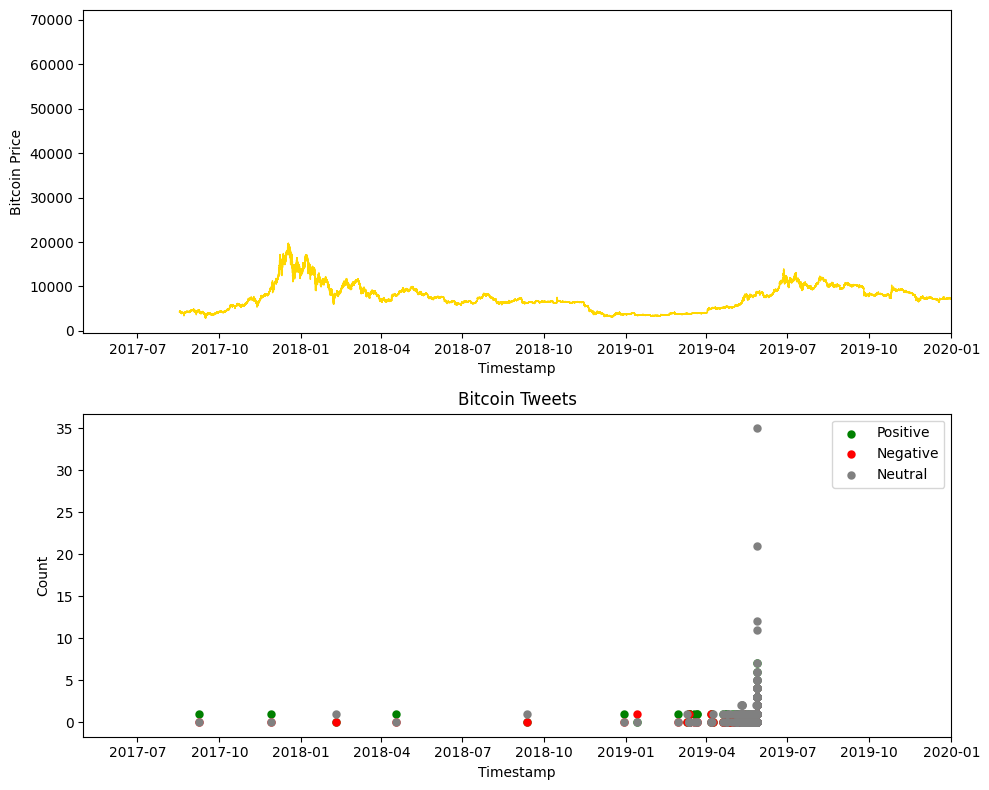

In [103]:
# Convert the 'Timestamp' column to datetime type
df_pd['timestamp'] = pd.to_datetime(df_pd['Timestamp'])

# Set the 'Timestamp' column as the index
df_pd.set_index('timestamp', inplace=True)

# Plot the time series for each category
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].plot(btc_prc.index, btc_prc["Price"],label='Price', color='gold',linewidth=1)
axs[0].set_xlabel('Timestamp')
axs[0].set_ylabel('Bitcoin Price')
axs[0].set_xlim(pd.Timestamp('2017-05-01'), pd.Timestamp('2020-01-01'))

# plt.figure(figsize=(10, 6))
# Plot positive counts
axs[1].scatter(df_pd.index, df_pd['Positive'], label='Positive', color='green',linewidth=0.04)

# Plot negative counts
axs[1].scatter(df_pd.index, df_pd['Negative'], label='Negative', color='red',linewidth=0.04)

# Plot neutral counts
axs[1].scatter(df_pd.index, df_pd['Neutral'], label='Neutral', color='grey',linewidth=0.04)

# Add labels, title, and legend
axs[1].set_xlabel('Timestamp')
axs[1].set_ylabel('Count')
axs[1].set_xlim(pd.Timestamp('2017-05-01'), pd.Timestamp('2020-01-01'))
axs[1].set_title('Bitcoin Tweets')
axs[1].legend()

# Show the plot
plt.tight_layout()
plt.show()




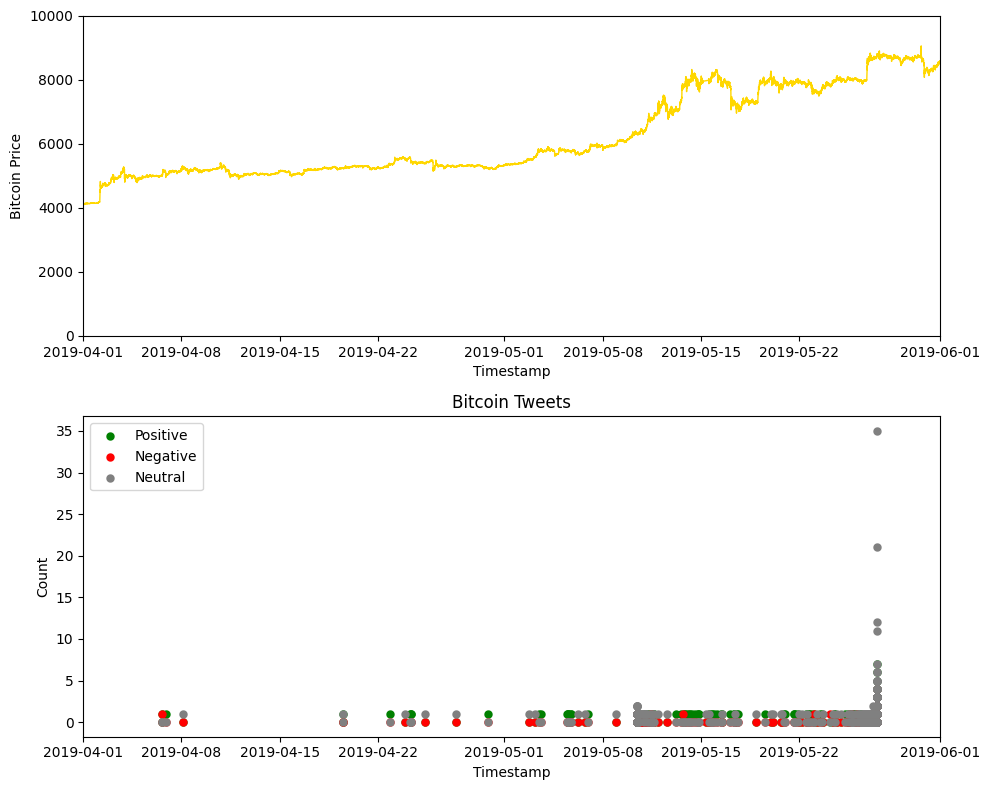

In [106]:
# Convert the 'Timestamp' column to datetime type
df_pd['timestamp'] = pd.to_datetime(df_pd['Timestamp'])

# Set the 'Timestamp' column as the index
df_pd.set_index('timestamp', inplace=True)

# Plot the time series for each category
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].plot(btc_prc.index, btc_prc["Price"],label='Price', color='gold',linewidth=1)
axs[0].set_xlabel('Timestamp')
axs[0].set_ylabel('Bitcoin Price')
axs[0].set_xlim(pd.Timestamp('2019-04-01'), pd.Timestamp('2019-06-01'))
axs[0].set_ylim(0,10000)

# plt.figure(figsize=(10, 6))
# Plot positive counts
axs[1].scatter(df_pd.index, df_pd['Positive'], label='Positive', color='green',linewidth=0.04)

# Plot negative counts
axs[1].scatter(df_pd.index, df_pd['Negative'], label='Negative', color='red',linewidth=0.04)

# Plot neutral counts
axs[1].scatter(df_pd.index, df_pd['Neutral'], label='Neutral', color='grey',linewidth=0.04)

# Add labels, title, and legend
axs[1].set_xlabel('Timestamp')
axs[1].set_ylabel('Count')
axs[1].set_xlim(pd.Timestamp('2019-04-01'), pd.Timestamp('2019-06-01'))
axs[1].set_title('Bitcoin Tweets')
axs[1].legend()

# Show the plot
plt.tight_layout()
plt.show()


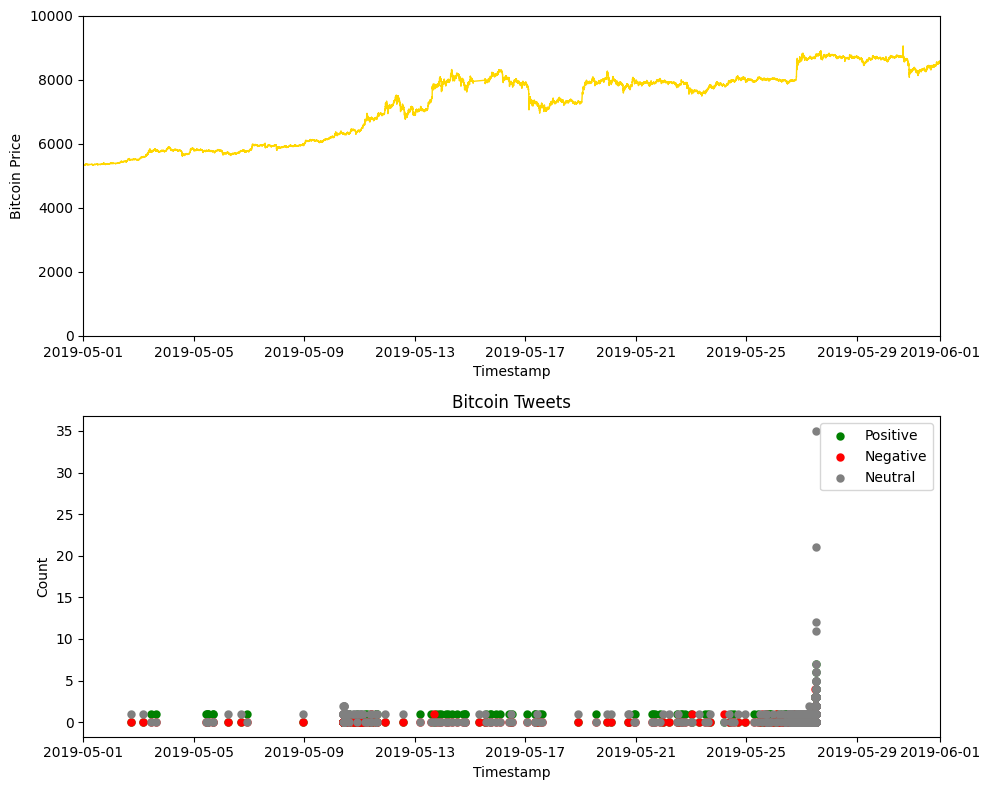

In [107]:
# Convert the 'Timestamp' column to datetime type
df_pd['timestamp'] = pd.to_datetime(df_pd['Timestamp'])

# Set the 'Timestamp' column as the index
df_pd.set_index('timestamp', inplace=True)

# Plot the time series for each category
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].plot(btc_prc.index, btc_prc["Price"],label='Price', color='gold',linewidth=1)
axs[0].set_xlabel('Timestamp')
axs[0].set_ylabel('Bitcoin Price')
axs[0].set_xlim(pd.Timestamp('2019-05-01'), pd.Timestamp('2019-06-01'))
axs[0].set_ylim(0,10000)

# plt.figure(figsize=(10, 6))
# Plot positive counts
axs[1].scatter(df_pd.index, df_pd['Positive'], label='Positive', color='green',linewidth=0.04)

# Plot negative counts
axs[1].scatter(df_pd.index, df_pd['Negative'], label='Negative', color='red',linewidth=0.04)

# Plot neutral counts
axs[1].scatter(df_pd.index, df_pd['Neutral'], label='Neutral', color='grey',linewidth=0.04)

# Add labels, title, and legend
axs[1].set_xlabel('Timestamp')
axs[1].set_ylabel('Count')
axs[1].set_xlim(pd.Timestamp('2019-05-01'), pd.Timestamp('2019-06-01'))
axs[1].set_title('Bitcoin Tweets')
axs[1].legend()

# Show the plot
plt.tight_layout()
plt.show()
